# Overview
This tutorial walks you through preparing your data for generating a digital twin of your own mouse. 

The approach transfers the frozen foundation core from the MICrONS digital twin and re-trains the readout feature weights on your provided dataset.

Instructions to download sample training and evaluation are included. These data can be used to test the training scheme in your environment. 

# Data directory structure

The input to the training script is a path to your data directory. Inside should be two subdirectories, `training_data` and `evaluation_data`.

For example if the data directory is called `data/` then the structure would look like this:

```
data/
├── training_data/
├── evaluation_data/
```

The contents of each subdirectory is discussed below.

## `training_data/`

`training_data/` must contain the following subdirectories:

```
training_data/
├── training/
├── samples/
├── stimuli/
├── perspectives/
├── modulations/
├── units/
```

Data for each experimental trial is split across these subdirectories. Corresponding files are linked by matching filenames.

For example, if each file is named by its `trial_id`, then the structure might look like:

```
training_data/
├── training/
│   ├── trial0.npy
│   ├── trial1.npy
│   ├── ...
│   └── trialN.npy
├── samples/
│   ├── trial0.npy
│   ├── trial1.npy
│   ├── ...
│   └── trialN.npy
├── stimuli/
│   ├── trial0.npy
│   ├── trial1.npy
│   ├── ...
│   └── trialN.npy
├── perspectives/
│   ├── trial0.npy
│   ├── trial1.npy
│   ├── ...
│   └── trialN.npy
├── modulations/
│   ├── trial0.npy
│   ├── trial1.npy
│   ├── ...
│   └── trialN.npy
├── units/
│   ├── trial0.npy
│   ├── trial1.npy
│   ├── ...
│   └── trialN.npy
```

To clarify the example further, data for a single experimental trial e.g. (`trial0`) will be split across the following paths:

* training - `/training_data/training/trial0.npy` 
* samples - `/training_data/samples/trial0.npy` 
* stimuli - `/training_data/stimuli/trial0.npy` 
* perspectives - `/training_data/perspectives/trial0.npy`
* modulations - `/training_data/modulations/trial0.npy` 
* units - `/training_data/units/trial0.npy` 

**Important:**

* Filenames (e.g. `trial0.npy`) can be arbitrary, as long as they are consistent across all subfolders.
* The sort order of filenames does not need to correspond to the order that trials were collected experimentally, and in the case of the provided example data, it does not. 
* Each subfolder must contain the same number of files, with identical names, to ensure alignment across modalities.
* All files should be numpy array files (`.npy`).


### Data specifications

The following is a description of the expected format of the `.npy` files in each subdirectory.

#### `training/`

Each file in this subdirectory contains a `boolean` value that represents whether the given trial should be included in the training set (`True`) or validation set (`False`).

The shape of the array must be: 

```python
() or (1,)
```

#### `samples/`

Each file in this subdirectory contains an `integer` that represents the number of samples (`n_samples`) for the given trial. 

`n_samples` is identical to the number of stimulus frames for the trial.

The shape of the array must be: 

```python
() or (1,)
```

#### `stimuli/`

Each file in this subdirectory contains the stimulus for the given trial. 

Datatype: `uint8`

Shape:

```python
(n_samples, height, width, channel)
```

Description:

    `n_samples` - the number of stimulus frames
    `height` - height of stimulus in pixels. must be 144 dimensions.
    `width` - width of stimulus in pixels. must be 256 dimensions.
    `channel` - must be 1 dimensional.

**Important:** 

* Values should range from 0 - 255
* The stimulus must be sampled at 30Hz to match the training regime for the foundation core.

#### `perspectives/`

Each file in this subdirectory contains the eye-tracking data for the trial.

Datatype: `float32`

Shape:

```python
(n_samples, position)
```

Description:

    `n_samples` - the number of stimulus frames
    `position` - the eye position columns. must be 2 dimensions. 
        column 0 - pupil_x
            Represents eye movement along the stimulus width axis.
        column 1 - pupil_y
            Represents eye movement along the stimulus height axis.
        
**Important:** 

* `pupil_x` must be normalized by centering by the mean and scaling by the standard deviation of the entire training set.
* `pupil_y` must be normalized by centering by the mean and scaling by the standard deviation of the entire training set.
* If perspective data is missing, fill in values with np.nan. 

#### `modulations/`

Each file in this subdirectory contains the modulation data for the given trial.

Datatype: `float32`

Shape:

```python
(n_samples, n_modulations)
```

Description:

    `n_samples` - the number of stimulus frames
    `n_modulations` - the number of modulation data columns. should contain 2 dimensions.
        column 0 - pupil_r
            Represents eye pupil radius
        column 1 - tread_vel
            Represents treadmill velocity

**Important:** 
* `pupil_r` must be normalized by centering by the mean and scaling by the standard deviation of the training set
* `tread_vel` must be normalized by centering by the mean and scaling by the standard deviation of the training set
* If modulation data is missing, fill in values with np.nan.  

#### `units/`

Each file in this subdirectory contains the neural response data for the given trial.

Datatype: `float32` 

Shape:

```python
(n_samples, n_units)
```

Description:

    `n_samples` - the number of stimulus frames
    `n_units` - the number of neurons 

**Important:** 
* Values must be scaled by the mean of the entire training set 
* All trials must contain the same number of units and the order of units must be conserved across trials.

## `evaluation_data/`

To evaluate your digital twin, you will need data from **repeat** experimental trials that are not used in training. 

By repeat, we mean that the identical stimulus must have been shown to the mouse multiple times. 

In our regime, we use 6 stimulus clips each repeated 10 times throughout the scan.

The repeated trials are necessary to measure neuron variability.

The data can be formatted similarly to training data but with a slightly different directory structure:

```
evaluation_data/
├── stimuli/
│   ├── video0/
│   │   ├── repeat0.npy
│   │   ├── repeat1.npy
│   │   ├── ...
│   │   └── repeatM.npy
│   ├── video1/
│   │   ├── repeat0.npy
│   │   ├── repeat1.npy
│   │   ├── ...
│   │   └── repeatM.npy
│   └── videoN/
│   │   ├── repeat0.npy
│   │   ├── repeat1.npy
│   │   ├── ...
│   │   └── repeatM.npy
├── perspectives/
│   ├── video0/
│   │   ├── repeat0.npy
│   │   ├── repeat1.npy
│   │   ├── ...
│   │   └── repeatM.npy
│   ├── video1/
│   │   ├── repeat0.npy
│   │   ├── repeat1.npy
│   │   ├── ...
│   │   └── repeatM.npy
│   └── videoN/
│   │   ├── repeat0.npy
│   │   ├── repeat1.npy
│   │   ├── ...
│   │   └── repeatM.npy
├── modulations/
│   ├── video0/
│   │   ├── repeat0.npy
│   │   ├── repeat1.npy
│   │   ├── ...
│   │   └── repeatM.npy
│   ├── video1/
│   │   ├── repeat0.npy
│   │   ├── repeat1.npy
│   │   ├── ...
│   │   └── repeatM.npy
│   └── videoN/
│       ├── repeat0.npy
│       ├── repeat1.npy
│       ├── ...
│       └── repeatM.npy
├── units/
│   ├── video0/
│   │   ├── repeat0.npy
│   │   ├── repeat1.npy
│   │   ├── ...
│   │   └── repeatM.npy
│   ├── video1/
│   │   ├── repeat0.npy
│   │   ├── repeat1.npy
│   │   ├── ...
│   │   └── repeatM.npy
│   └── videoN/
│       ├── repeat0.npy
│       ├── repeat1.npy
│       ├── ...
│       └── repeatM.npy
```

Inside `evaluation_data` there should be 4 subdirectories named:
* `stimuli/`
* `perpectives/`
* `modulations/`
* `units/`

In each of these subdirectories there should be additional subdirectories for each unique stimulus video.

For example, in the file structure above, there are `N` unique stimulus videos and each has a subdirectory named from `video0/` to `videoN/`.

The name of these `video` subdirectories can be anything, as long as the names are consistent across all other directories.

Inside these `video` subdirectories can be found the repeat trial data.

In the example above, these repeat trials are named from `repeat0.npy` to `repeatM.npy` where `M` represents the number of repeats for a given video. 

These `repeat` files can have any name, so long as the names are consistent across all other directories.

To clarify the example further, the data for a single experimental trial e.g. the first repeat (`repeat0`) for the first video (`video0`) will be split across these paths:

* stimuli - `/evaluation_data/stimuli/video0/repeat0.npy`
* perspectives - `/evaluation_data/perspectives/video0/repeat0.npy`
* modulations - `/evaluation_data/modulations/video0/repeat0.npy`
* units - `/evaluation_data/units/video0/repeat0.npy`

**Important:** 
* The evaluation data should match the same specifications as its respective subdirectory in `training_data/`, see instructions above.
    * For example, the stimulus `.npy` files in `evaluation_data` should be prepared in the same manner as the stimulus `.npy` files in `training_data`.
    * Furthermore, the evaluation data should be normalized according to the values computed on the training set.

# Example data

The code below downloads and inspects training data for one of the mice in the foundation cohort. 

This data can be used to test that readout training and model evaluation works on your system.

## Download data

Run the following script in the cell below to download the data: 

```python
!bash /workspace/fnn/scripts/download_digital_twin_training_example_data.sh
```

To modify the directory where the data will be downloaded to, pass it as the first argument:

```python
!bash /workspace/fnn/scripts/download_digital_twin_training_example_data.sh /my/custom/path
```

**IMPORTANT:** If you download the data to your own path, make sure you update the training config file with the new paths (See tutorial for training digital twin)

By default the data will be saved in this container to `/workspace/fnn/data/train_digital_twin/`.

Once downloaded, the directory structure should look like:

```
/train_digital_twin/
├── training_data_27203_4_7/
├── evaluation_data_27203_4_7/
```

In [45]:
import os
os.environ['PATH']

'/home/kumarv4@hhmi.org/miniconda3/envs/fnn/bin:/home/kumarv4@hhmi.org/miniconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin'

In [ ]:
# !bash ./repos/fnn/scripts/download_digital_twin_training_example_data.sh /groups/saalfeld/saalfeldlab/vijay/fnn/

Error: AWS CLI not found. Install with 'sudo apt install awscli' or 'pip install awscli'.


# Inspect data

In [46]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import animation
# from IPython.display import HTML
import mediapy as mp

In [47]:
base_dir = Path("/groups/saalfeld/saalfeldlab/vijay/fnn/")
training_data_dir = base_dir / 'training_data_27203_4_7'
evaluation_data_dir = base_dir / 'evaluation_data_27203_4_7/'

## `training_data/`

### Initialize subdirectory paths

In [48]:
train_dir = training_data_dir / 'training'
sampl_dir = training_data_dir / 'samples'
stimu_dir = training_data_dir / 'stimuli'
persp_dir = training_data_dir / 'perspectives'
modul_dir = training_data_dir / 'modulations'
units_dir = training_data_dir / 'units'

### Load data for a single trial

In [49]:
trial_id = 'trial0.npy'
train_data = np.load(train_dir / trial_id)
sampl_data = np.load(sampl_dir / trial_id)
stimu_data = np.load(stimu_dir / trial_id)
persp_data = np.load(persp_dir / trial_id)
modul_data = np.load(modul_dir / trial_id)
units_data = np.load(units_dir / trial_id)

#### `training/` single trial 

In [50]:
train_data

array(True)

#### `samples/` single trial 

In [51]:
sampl_data

array(300)

#### `stimuli/` single trial 

In [52]:
rows, cols = stimu_data.shape[1:3]
stimu_data.shape

(300, 144, 256, 1)

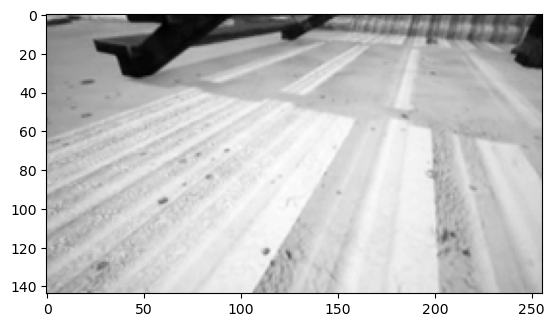

In [53]:
fig, ax = plt.subplots()
ax.imshow(stimu_data[0], cmap='binary_r')

In [54]:
mp.show_video(stimu_data[:, :, :, 0], fps=20)

#### `perspectives/` single trial 

In [55]:
persp_data.shape

(300, 2)

In [56]:
import skimage.draw

def make_disk(pdata, r):
    rr, cc = skimage.draw.disk(
        pdata[::-1]*(rows, cols) + (rows/2, cols/2),
        5,
        shape=(rows, cols)
    )
    img = np.zeros((rows, cols), dtype=np.uint8)
    img[rr, cc] = 255
    return img

imgs = np.stack(
    [
        make_disk(persp_data[i], r=5)
        for i in range(300)
    ], axis=0)

mp.show_video(imgs, fps=10)


Text(0, 0.5, 'eye position Y')

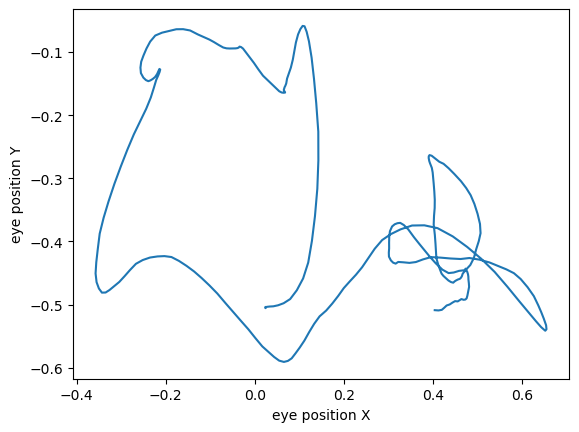

In [57]:
fig, ax = plt.subplots()
ax.plot(*persp_data.T)
ax.set_xlabel('eye position X')
ax.set_ylabel('eye position Y')

#### `modulations/` single trial 

In [37]:
modul_data.shape

(300, 2)

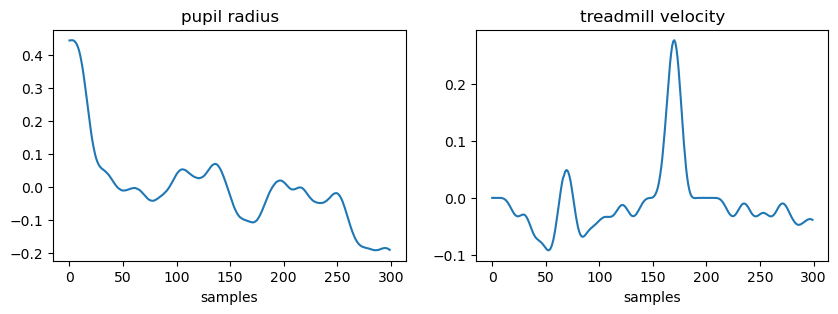

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].plot(modul_data[:, 0])
axs[1].plot(modul_data[:, 1])
axs[0].set_title('pupil radius')
axs[1].set_title('treadmill velocity')
for ax in axs:
    ax.set_xlabel('samples') 

#### `units/` single trial 

In [18]:
units_data.shape

(300, 8509)

Text(0.5, 1.0, 'single unit response')

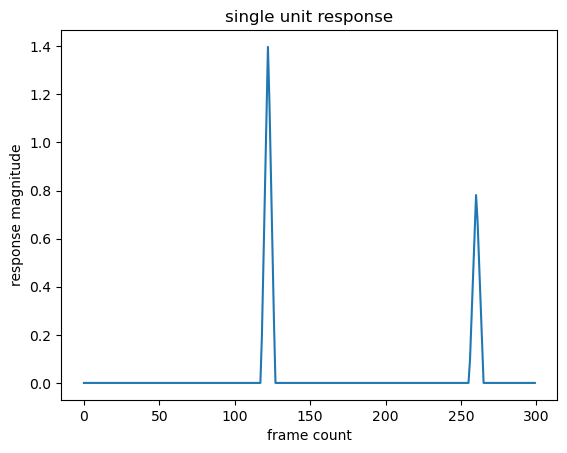

In [19]:
fig, ax = plt.subplots()
ax.plot(units_data[:, 0])
ax.set_xlabel('frame count')
ax.set_ylabel('response magnitude')
ax.set_title('single unit response')

## `evaluation_data/`

In [20]:
stimu_dir = evaluation_data_dir / 'stimuli'
persp_dir = evaluation_data_dir / 'perspectives'
modul_dir = evaluation_data_dir / 'modulations'
units_dir = evaluation_data_dir / 'units'

In [21]:
video_id = 'video0'
trial_ids = ['repeat0', 'repeat1', 'repeat2'] # load 3 repeat trials
stimu_data = {}
persp_data = {}
modul_data = {}
units_data = {}
for trial_id in trial_ids:
    stimu_data[trial_id] = np.load((stimu_dir / video_id / trial_id).with_suffix('.npy'))
    persp_data[trial_id] = np.load((persp_dir / video_id / trial_id).with_suffix('.npy'))
    modul_data[trial_id] = np.load((modul_dir / video_id / trial_id).with_suffix('.npy'))
    units_data[trial_id] = np.load((units_dir / video_id / trial_id).with_suffix('.npy'))

### `stimuli/`

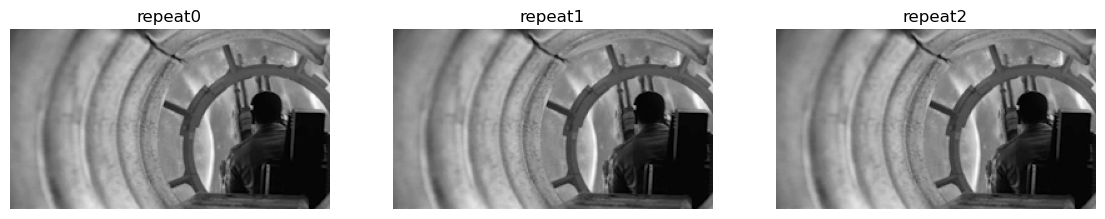

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
for ax, (name, stim) in zip(axs, stimu_data.items()):
    ax.imshow(stim[0], cmap='binary_r')
    ax.set_title(name)
    ax.axis('off')

#### `perspectives/` repeat trials 

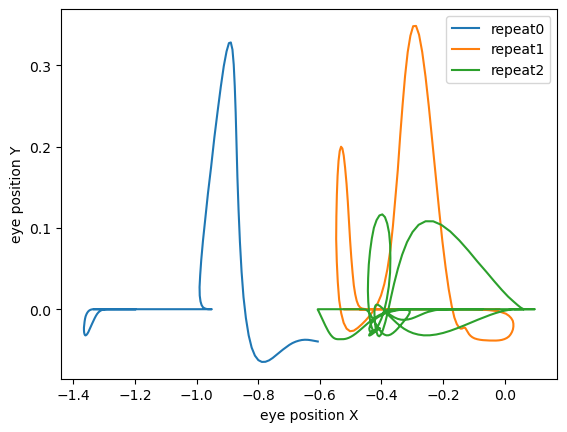

In [23]:
fig, ax = plt.subplots()
for name, persp in persp_data.items():
    ax.plot(*persp.T, label=name)
    ax.set_xlabel('eye position X')
    ax.set_ylabel('eye position Y')
ax.legend()

#### `modulations/` repeat trial 

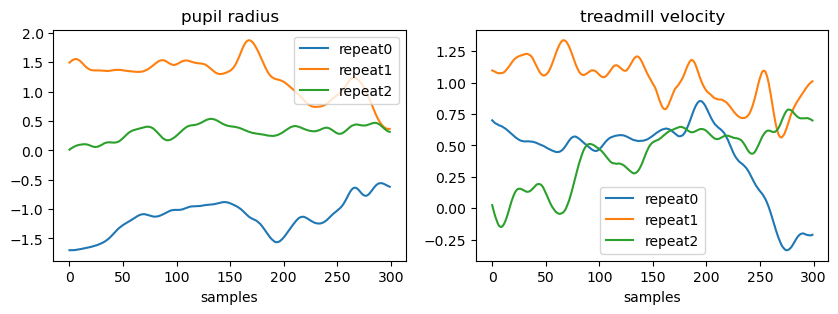

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
for k, v in modul_data.items():
    axs[0].plot(v[:, 0], label=k)
    axs[1].plot(v[:, 1], label=k)
    axs[0].set_title('pupil radius')
    axs[1].set_title('treadmill velocity')
for ax in axs:
    ax.set_xlabel('samples')
    ax.legend()

#### `units/` repeat trial 

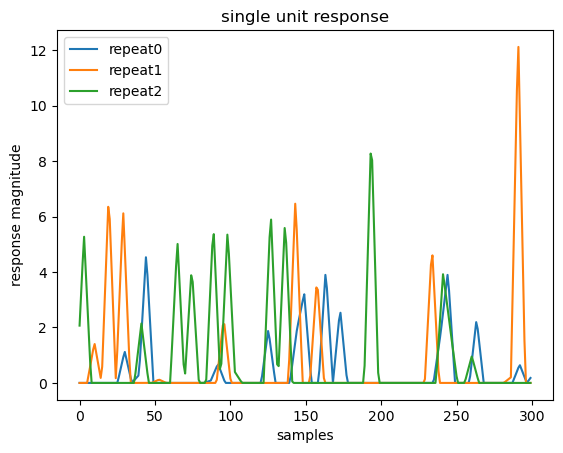

In [25]:
fig, ax = plt.subplots()
for k, v in units_data.items():
    ax.plot(v[:, 0], label=k)
    ax.set_xlabel('samples')
    ax.set_ylabel('response magnitude')
    ax.set_title('single unit response')
ax.legend()    

In [39]:
z = np.load("/groups/saalfeld/saalfeldlab/vijay/fnn/data/microns_digital_twin/properties/responses/stimulus.npy")

In [40]:
z.shape

(75000, 144, 256)

In [41]:
import pandas as pd
df = pd.read_csv("/groups/saalfeld/saalfeldlab/vijay/fnn/data/microns_digital_twin/properties/responses/metadata.csv")

In [44]:
df.head()

,animal_id,session,scan_idx,data_id,network_id,instance_id,videoset_id,burnin_frames,sampling_frequency,stimulus_height,stimulus_width
0,17797,4,7,232ba7ad384c7b93f58842b51e7e1ef6,c17d459afa99a88b3e48a32fbabc21e4,6600970e9cfe7860b80a70375cb6f20c,e3dd23445aaca70cb9d0d4eb8eea95ce,10,30.0,144,256
1,17797,5,6,98a58d55e28951a38cc61cfec7d63f76,c17d459afa99a88b3e48a32fbabc21e4,6600970e9cfe7860b80a70375cb6f20c,e3dd23445aaca70cb9d0d4eb8eea95ce,10,30.0,144,256
2,17797,5,7,6dea1dbe556674b1ebd8f984edd102c0,c17d459afa99a88b3e48a32fbabc21e4,6600970e9cfe7860b80a70375cb6f20c,e3dd23445aaca70cb9d0d4eb8eea95ce,10,30.0,144,256
3,17797,6,2,45dc6cb6ed757fb223cdfa846060a2bf,c17d459afa99a88b3e48a32fbabc21e4,6600970e9cfe7860b80a70375cb6f20c,e3dd23445aaca70cb9d0d4eb8eea95ce,10,30.0,144,256
4,17797,6,4,c947b82486ab3d4dfd2972e21ad2ce3b,c17d459afa99a88b3e48a32fbabc21e4,6600970e9cfe7860b80a70375cb6f20c,e3dd23445aaca70cb9d0d4eb8eea95ce,10,30.0,144,256
